# 🔩 Boilerplate

In [1]:
# Imports
import os
import random
import matplotlib.pyplot as plt
import cv2

from yolo_to_coco import convert_yolo_to_coco

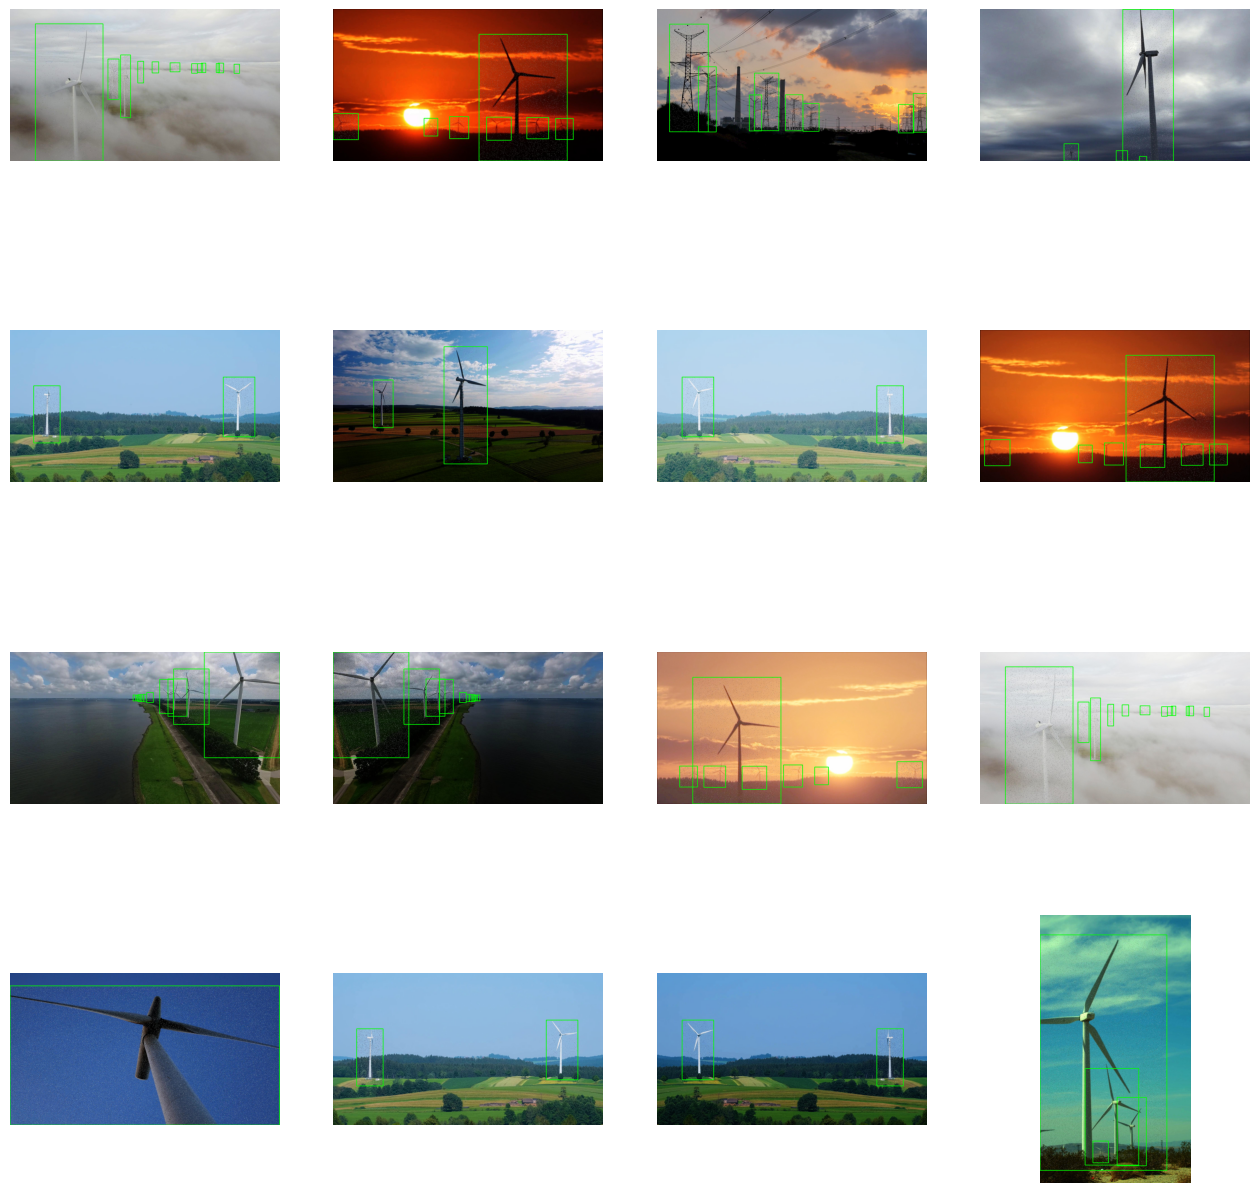

In [2]:
# Download the dataset here: https://www.kaggle.com/datasets/kylegraupe/wind-turbine-image-dataset-for-computer-vision?resource=download

# Define the paths to the images and labels directories
train_images = "../data/train/images"
train_labels = "../data/train/labels"

test_images = "../data/test/images"
test_labels = "../data/test/labels"

val_images = "../data/valid/images"
val_labels = "../data/valid/labels"

# Get a list of all the image files in the training images directory
image_files = os.listdir(train_images)

# Choose 16 random image files from the list
random_images = random.sample(image_files, 16)

# Set up the plot
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

# Loop over the random images and plot the object detections
for i, image_file in enumerate(random_images):
    row = i // 4
    col = i % 4

    # Load the image
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    # Load the labels for this image
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    # Loop over the labels and plot the object detections
    # Loop over the labels and plot the object detections
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)


    # Show the image with the object detections
    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

plt.show()

# 💾 Convert data from YOLO to COCO format

In [4]:
train_dir = "../data/train"
val_dir = "../data/valid"
test_dir = "../data/test"
output_path = "../data/coco"

dirs = [train_dir, val_dir, test_dir]

for dir in dirs:
    output_json_file = os.path.join(output_path, os.path.basename(dir) + ".json")
    convert_yolo_to_coco(dir, output_json_file)

# 🚵 Model Training